In [ ]:
# Figure 3A and 3B.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr


In [2]:
# load data to use in analysis

df_npq_simoa =  pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="NPQ_and_SIMOA_Data")



In [3]:
# Build mapping dict for Mapping Target Names to be used in paper
df_target_names = pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target Name")
mapping = dict(zip(df_target_names["Target Name on NULISAseq™ CNS Disease Panel "], df_target_names["Target Name used in the paper"]))

# Rename columns
data = df_npq_simoa.rename(columns=mapping)

In [4]:
# Creating a function for statistical analysis and plotting
def spearman_correlation_plots(df, marker, x_axis, y_axis):
    results = []
    corr, p_value = spearmanr(df[x_axis], df[y_axis], nan_policy="omit", alternative="two-sided")
    
    # Calculate 95% CI for Spearman correlation
    n = len(df)
    if n > 2:
        z = np.arctanh(corr)  # Fisher's Z-transformation
        se = 1 / np.sqrt(n - 3)  # Standard error
        z_ci = [z - 1.96 * se, z + 1.96 * se]  # 95% CI in z-space
        ci = np.tanh(z_ci)  # Convert back to r-space
    else:
        ci = (np.nan, np.nan)

    # Append results
    results.append({
        "Biomarker": y_axis,
        "Spearman Correlation": corr,
        "p-value": p_value,
        "95% CI Lower": ci[0],
        "95% CI Upper": ci[1],
        "Sample Size": n
    })

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.regplot(x=df[x_axis], y=df[y_axis], scatter_kws={"alpha": 0.8, "color": "black"}, line_kws={"color": "red"})
    plt.text(0.9, 0.2, f"Spearman r = {corr:.2f}\n"
                        f"95% CI = [{ci[0]:.2f}, {ci[1]:.2f}]\n"
                        f"n = {n}",
                horizontalalignment="right",
                verticalalignment="top",
                transform=plt.gca().transAxes,
                fontsize=16,
                bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", boxstyle="round,pad=0.5"))

    plt.xlabel(f"Simoa (log2(pg/mL))", labelpad=20, fontsize=30)
    plt.ylabel(f"NULISAseq (NPQ)", labelpad=20, fontsize=30)
    plt.title(f"Serum {marker}", loc="center", fontsize=30, pad=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    plt.savefig(f".\\figures\\assay_correlation_{marker}.png", dpi=300)
    plt.show()

    # Create a DataFrame for results
    results_df = pd.DataFrame(results)
    return results_df

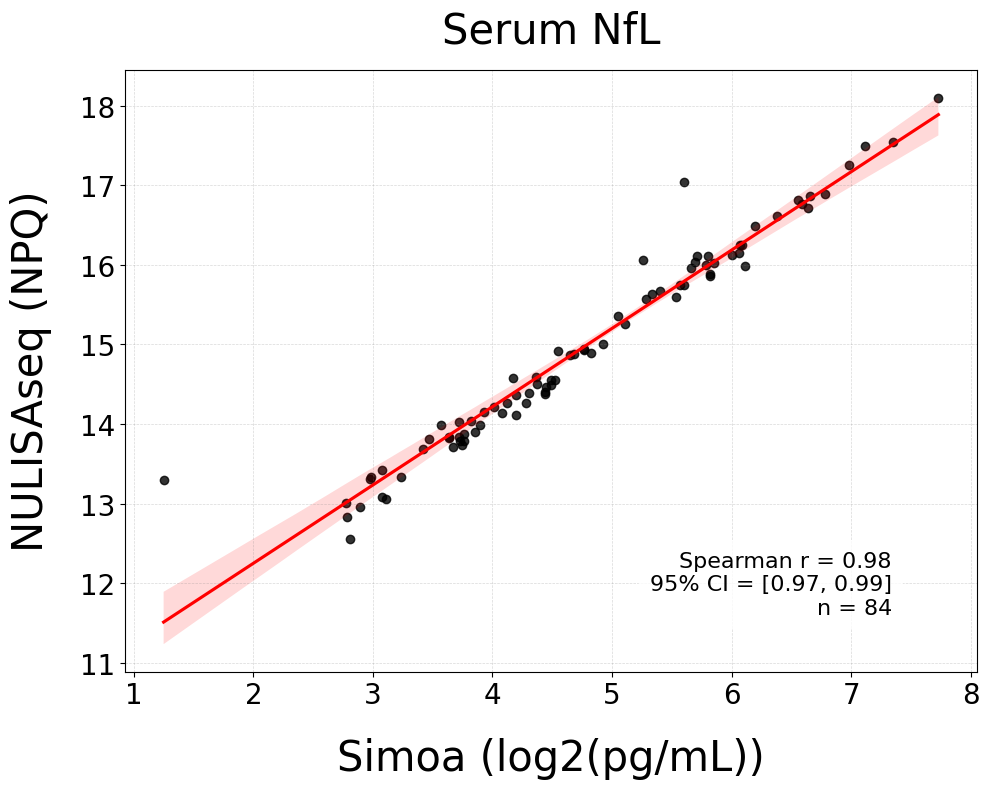

In [5]:

# NfL correlation analysis between assays - Figure 3A

# from simoa data
x_axis = "Simoa NfL log2(pg/mL)"

# from nulisa data
y_axis = "NfL"

# marker selected to be displayed on title
marker = "NfL" 

NfL_correlation = spearman_correlation_plots(df = data, marker = marker, x_axis = x_axis, y_axis = y_axis)




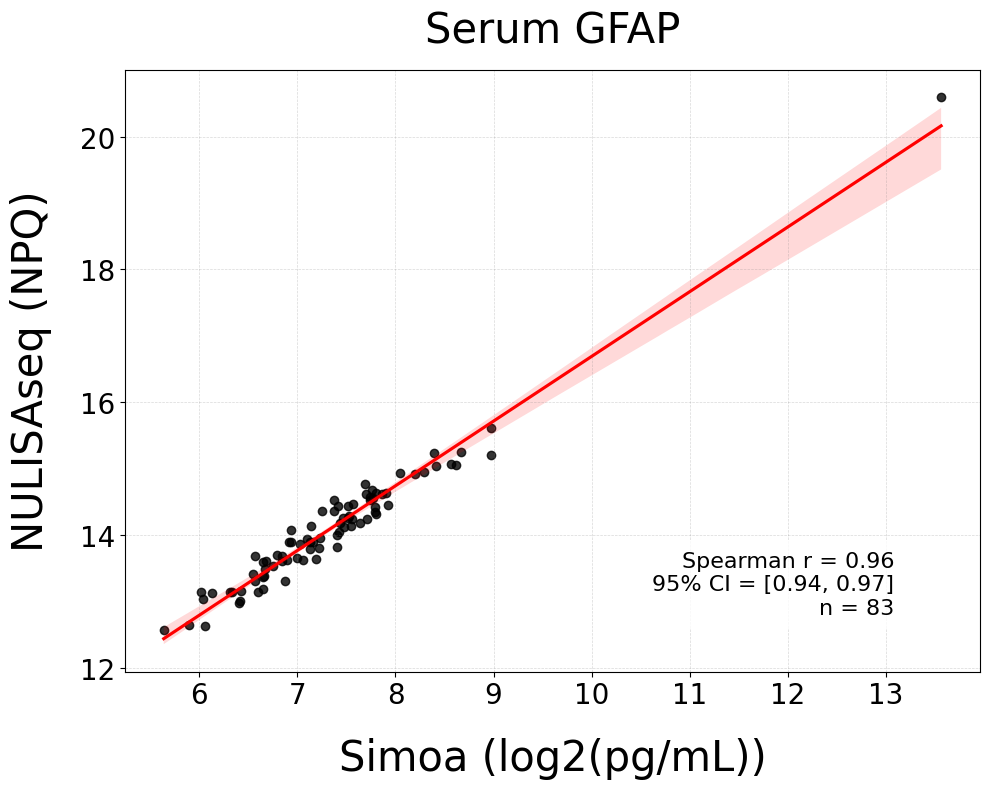

In [6]:
# GFAP correlation analysis between assays - Figure 3D

# exclude Simoa NLS69 from GFAP correlation analysis sample as CV > 20% 
df_gfap = data[data["sample_barcode"] != "NLS69"]

# from simoa data
x_axis = "Simoa GFAP log2(pg/mL)" 

# from nulisa data
y_axis = "GFAP" 

# marker selected to be displayed on title
marker = "GFAP" 

GFAP_correlation = spearman_correlation_plots(df = df_gfap, marker = marker, x_axis = x_axis, y_axis = y_axis)


